In [11]:
##importing library files

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [12]:
# #Importing the dataset

dataset = pd.read_csv('bank-additional-full data.csv')
# X = dataset.iloc[:, :-1].values
# y = dataset.iloc[:, -1].values

In [13]:
dataset.head()
# dataset.columns
# dataset.rpow

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,compaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [14]:
#function to check data type, unique entries, null entries in particular column

def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 

In [15]:
check(dataset)

,column,dtypes,nunique,sum_null
0,age,int64,78,0
1,job,object,12,0
2,marital,object,4,0
3,education,object,8,0
4,default,object,3,0
5,housing,object,3,0
6,loan,object,3,0
7,contact,object,2,0
8,month,object,10,0
9,day_of_week,object,5,0


In [16]:
#differentiate on the basis of datatype

var_categorical = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week", 
                  "poutcome"]
var_numerical = ["age", "duration", "compaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx",
                "euribor3m", "nr.employed"]
print(len(var_categorical), len(var_numerical))

10 10


# Taking care of missing data

In [17]:
#replacing unknown by nan
dataset.replace('unknown', np.NaN, inplace=True)

In [18]:
#calculating percentage of missing values in each column
dataset.isnull().sum()/len(dataset)*100

age                0.000000
job                0.801204
marital            0.194231
education          4.202680
default           20.872584
housing            2.403613
loan               2.403613
contact            0.000000
month              0.000000
day_of_week        0.000000
duration           0.000000
compaign           0.000000
pdays              0.000000
previous           0.000000
poutcome           0.000000
emp.var.rate       0.000000
cons.price.idx     0.000000
cons.conf.idx      0.000000
euribor3m          0.000000
nr.employed        0.000000
y                  0.000000
dtype: float64

# Exploratory  data analysis


In [19]:
import seaborn as sns

In [20]:
# Function to label the count on top of each bar in graph
def label_values(ax, spacing=5):
    total = 0
    for rect in ax.patches:
        total += rect.get_height()

    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        space = spacing
        
        va = 'bottom'
        
        if y_value < 0:
            space *= -1
            va = 'top'
        label = "{:.2f}, {:.2f}".format(y_value, y_value/total*100)
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)  

# a. Categorical Variables

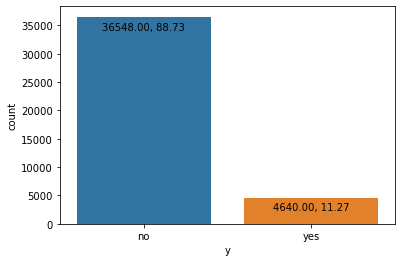

In [21]:
#checking last column (yes and no) 
ax = sns.countplot(x = dataset['y'])  #Imbalanced dataset
label_values(ax, spacing=-15)
plt.show()

Job


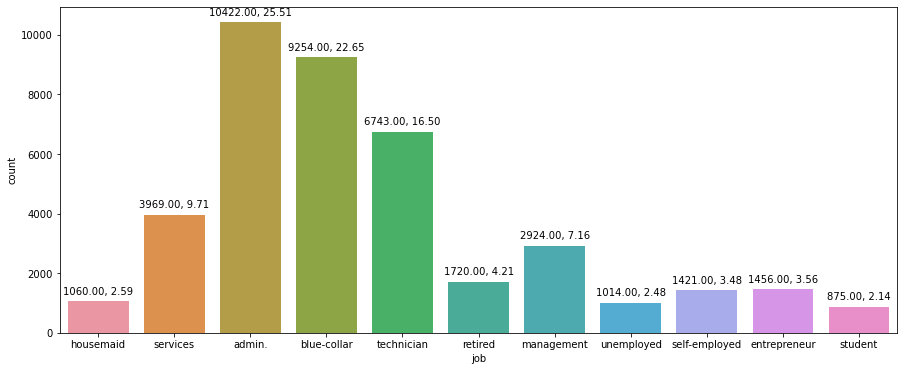

Marital


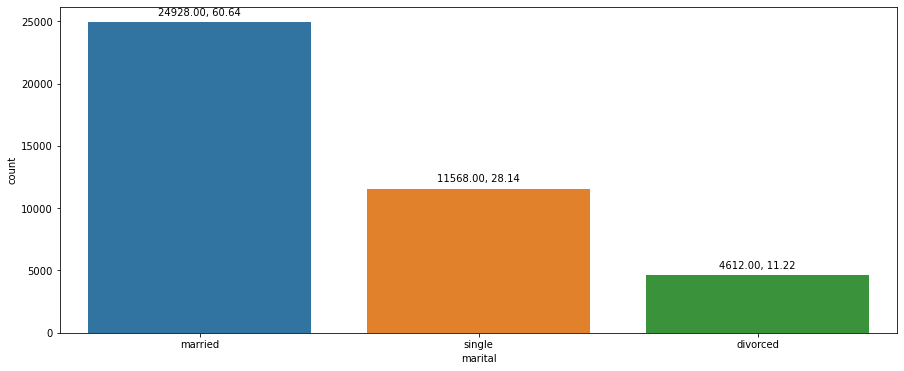

Education


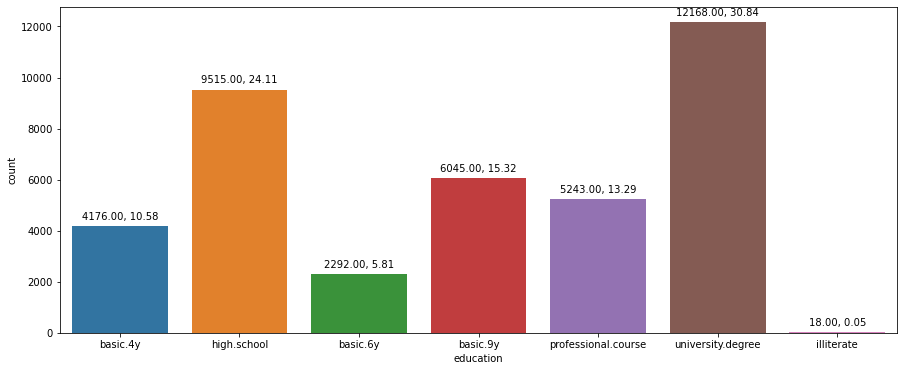

Default


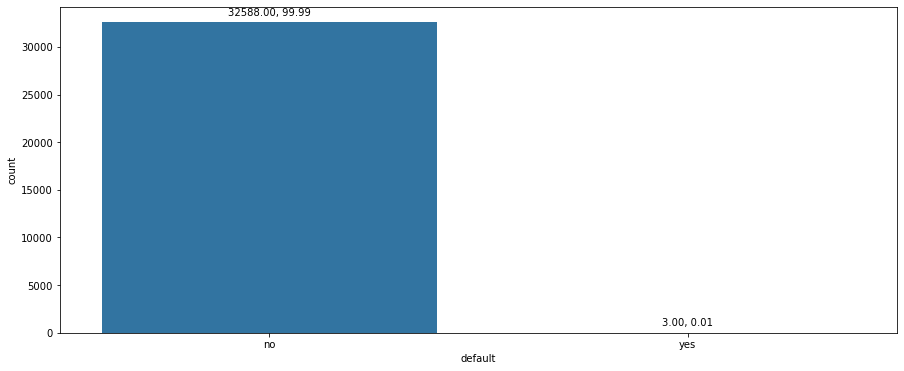

Housing


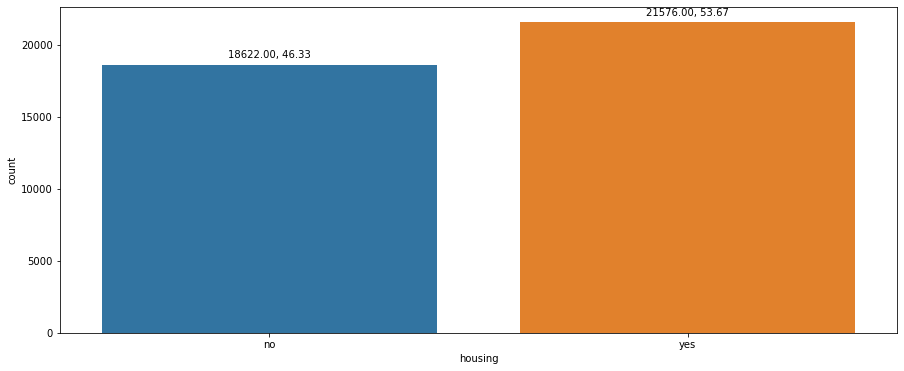

Loan


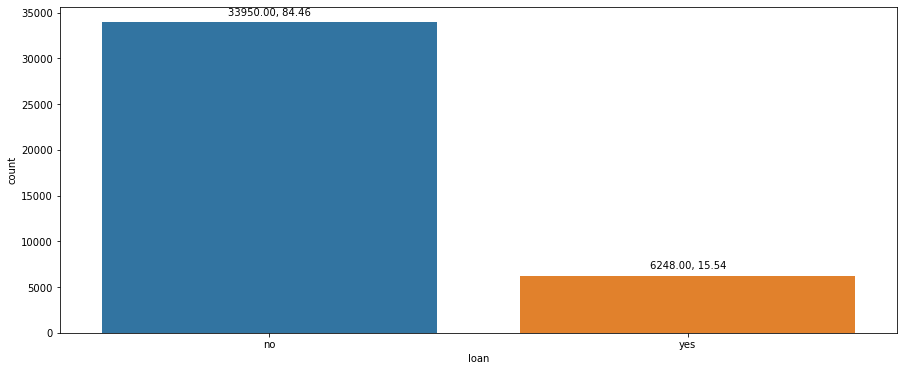

Contact


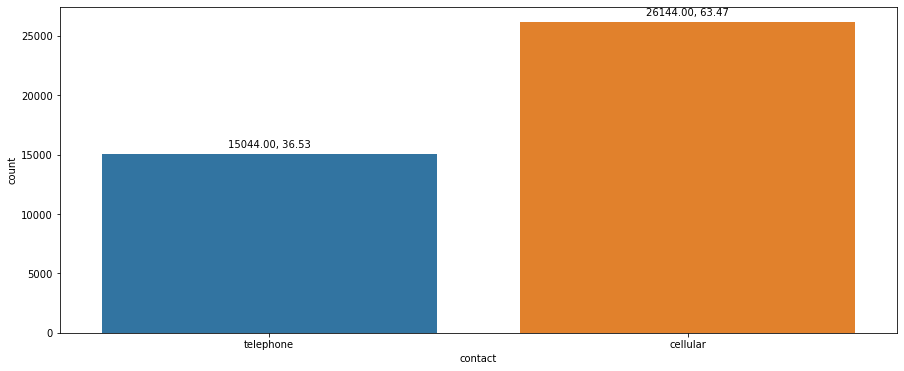

Month


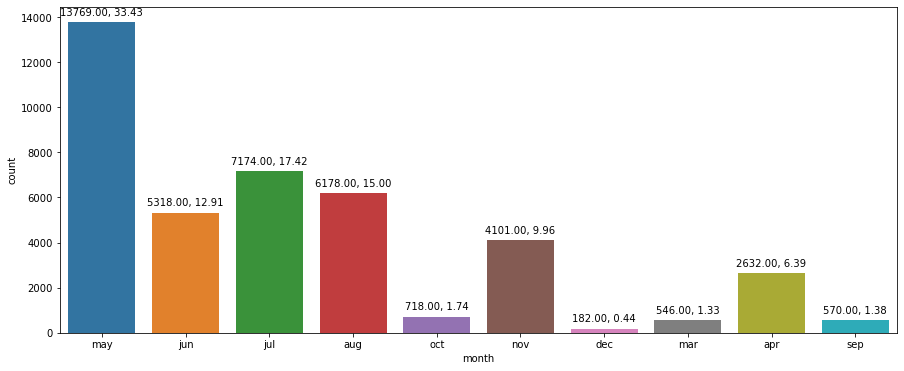

Day_Of_Week


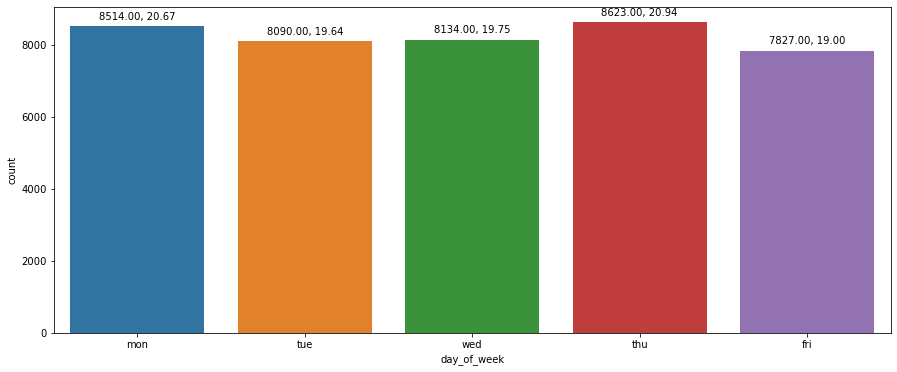

Poutcome


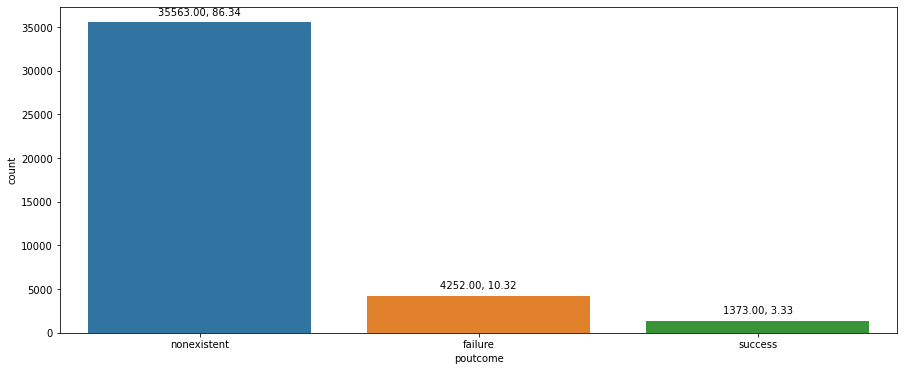

In [22]:
for column in var_categorical:
    plt.figure(figsize=(15, 6))
    print(column.title())
    ax = sns.countplot(x = dataset[column])
    label_values(ax)
    plt.show()

Job


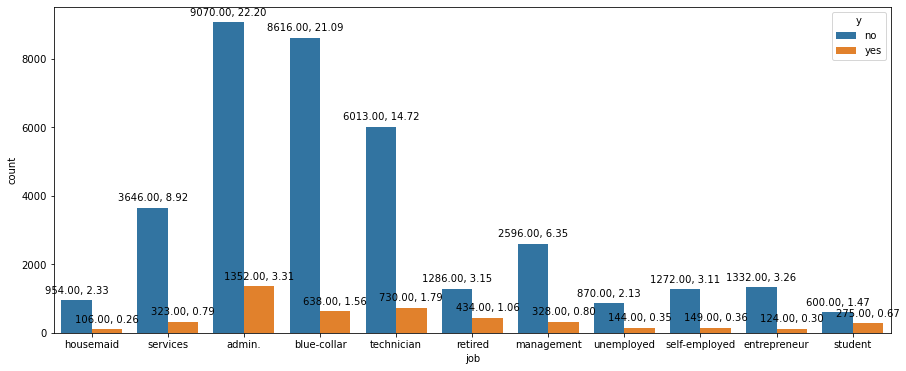

Marital


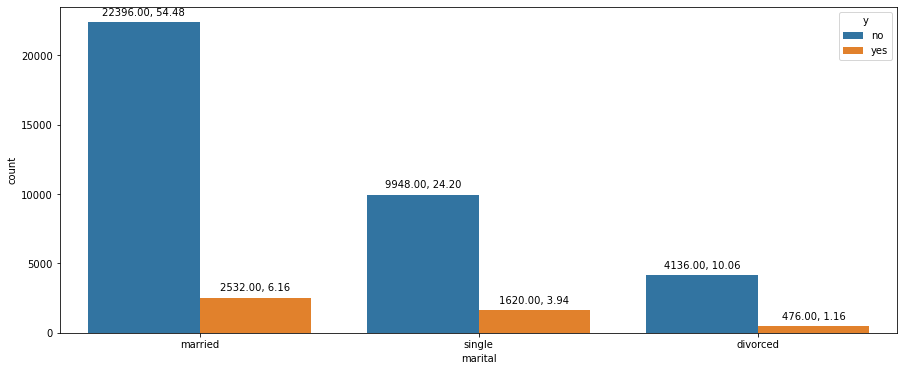

Education


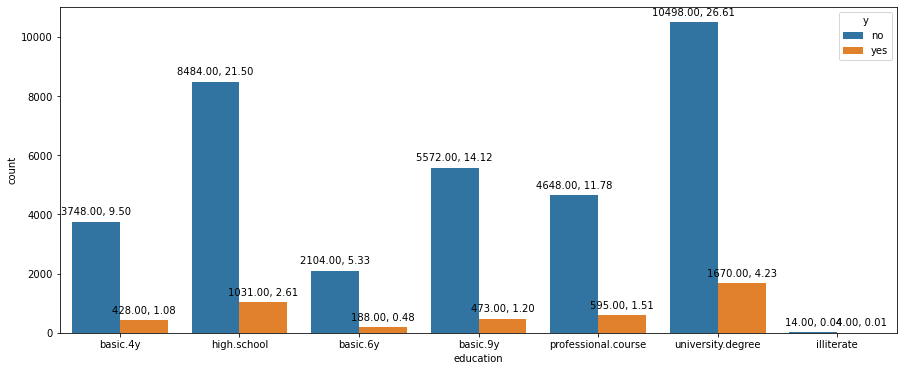

Default


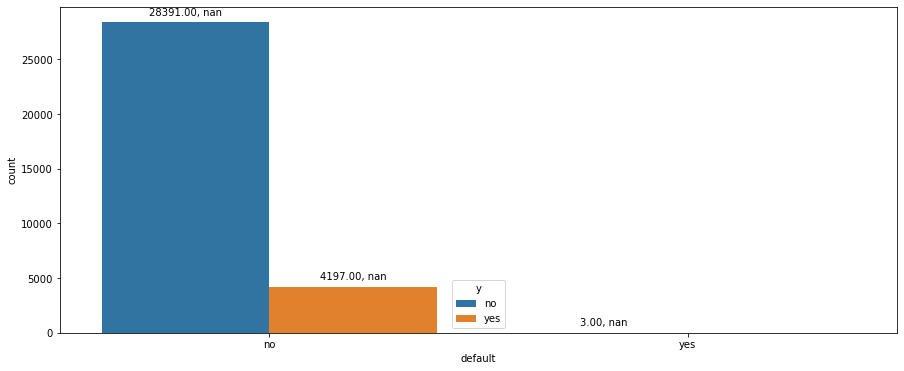

Housing


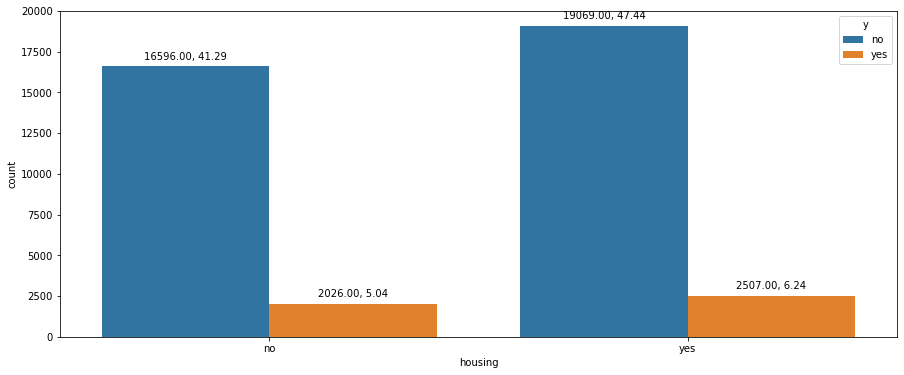

Loan


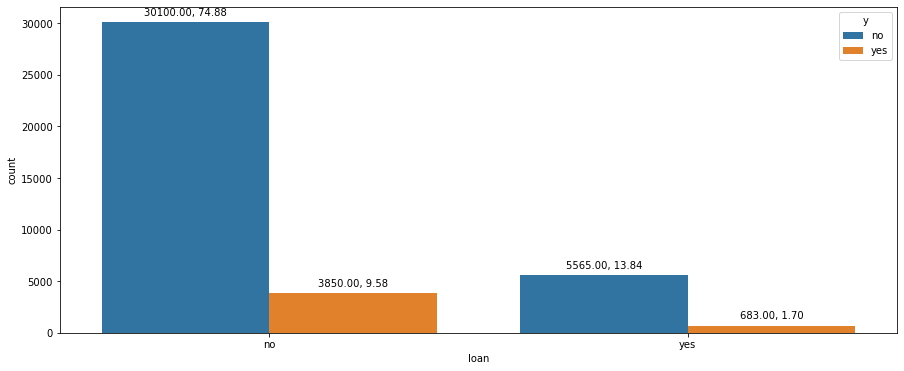

Contact


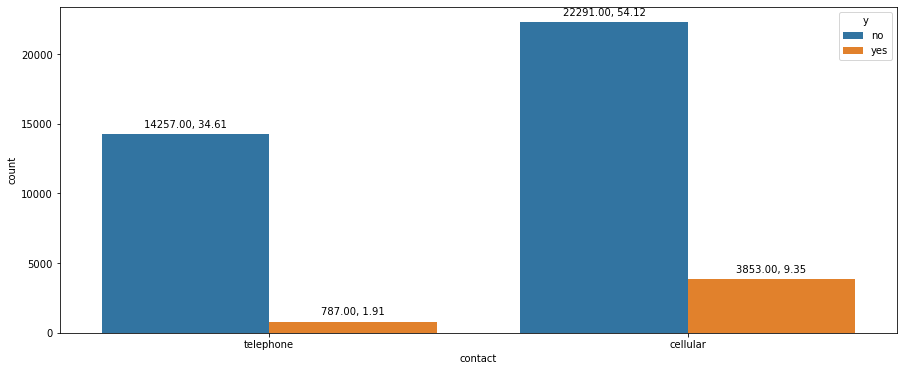

Month


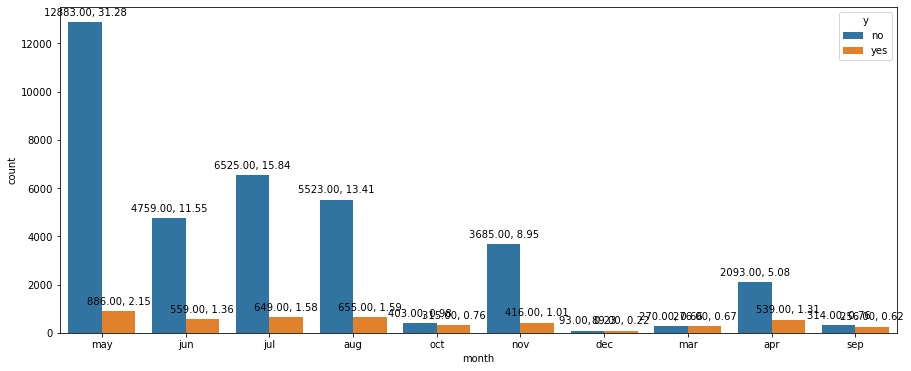

Day_Of_Week


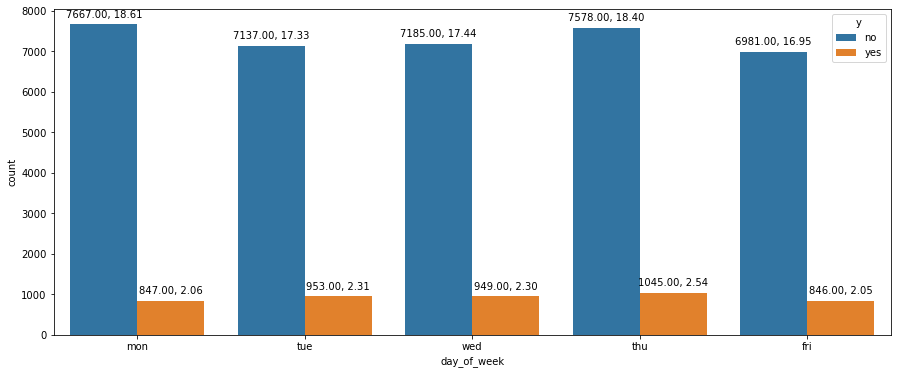

Poutcome


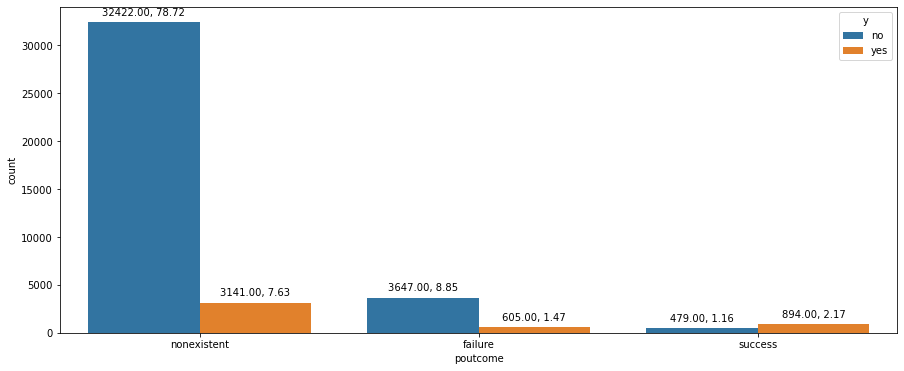

In [23]:
for column in var_categorical:
    plt.figure(figsize=(15, 6))
    print(column.title())
    ax = sns.countplot(x = dataset[column], hue=dataset['y'])
    label_values(ax)
    plt.show()

In [24]:
# Default variable has no impact on the client subscribing for term deposit.
# As we can see with no as input client took the term deposit and client having credit are not taking term deposit.
# So we will drop this feature
dataset.drop(["default"], axis = 1, inplace=True)

In [25]:
#removing the column default from the categorical variable
var_categorical = list(set(var_categorical) - set(['default']))

In [26]:
#removing missing value rows
dataset.dropna(inplace=True)

In [27]:
#calculating percentage of missing values in each column i.e should be zero as we've already removed null values 
dataset.isnull().sum()/len(dataset)*100

age               0.0
job               0.0
marital           0.0
education         0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
compaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64

# b. Numerical Variables


In [28]:
# Drop the duration column
duration = dataset["duration"]
dataset.drop(["duration"], axis = 1, inplace=True)

In [29]:
# removing column duration from numerical variables list
var_numerical = list(set(var_numerical) - set(['duration']))

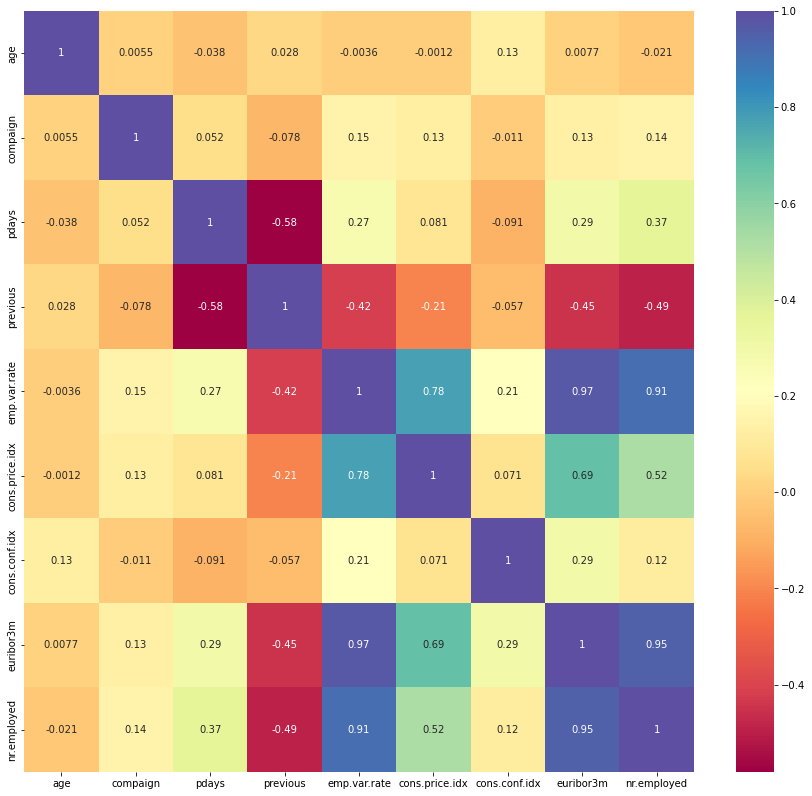

In [30]:
# heatmap 

plt.figure(figsize=(15, 14))
sns.heatmap(dataset.corr(), annot=True, cmap='Spectral')
plt.show()

# Handling highly correlated variables

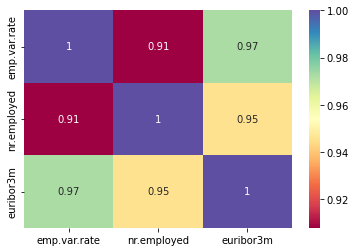

In [31]:
sns.heatmap(dataset[["emp.var.rate", "nr.employed", "euribor3m"]].corr(), annot=True, cmap='Spectral')
plt.show()

Positive high correlation between:

1) 'emp.var.rate' and 'nr.employed'
2) 'emp.var.rate' and 'euribor3m'
3) 'euribor3m' and 'nr.employed'



In [32]:
# so dropping the columns 'emp.var.rate' and 'nr.employed'
dataset.drop(['emp.var.rate' , 'nr.employed'], axis = 1, inplace=True)



In [33]:
#removing those columns from numerical variables ki list
var_numerical = list(set(var_numerical) - set(['emp.var.rate', 'nr.employed']))

Age


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


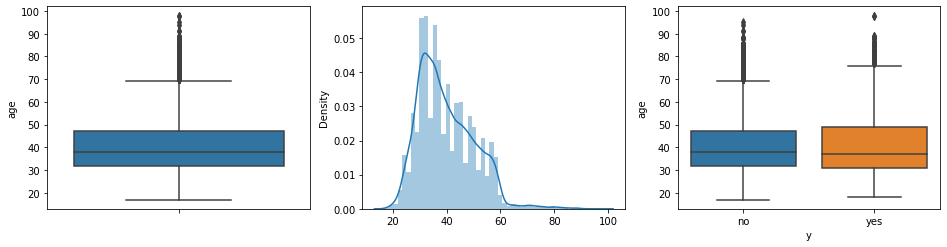

Euribor3M


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


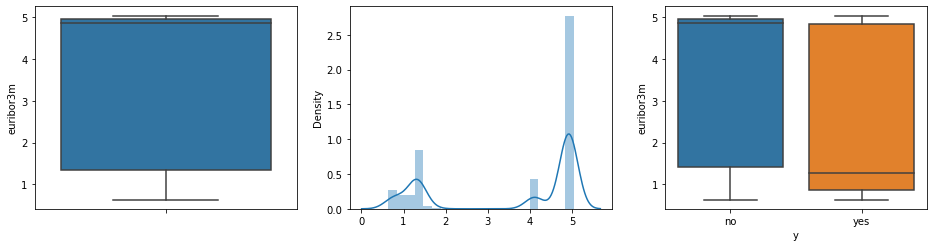

Previous


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


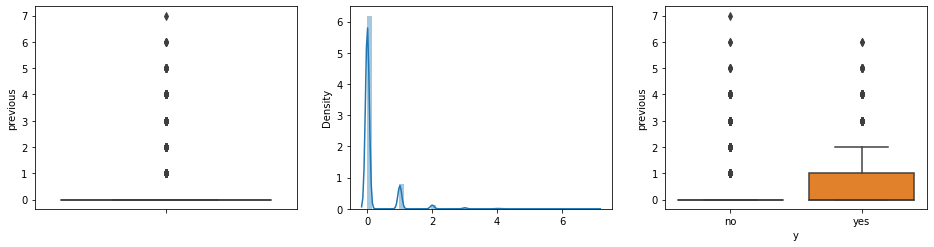

Cons.Conf.Idx


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


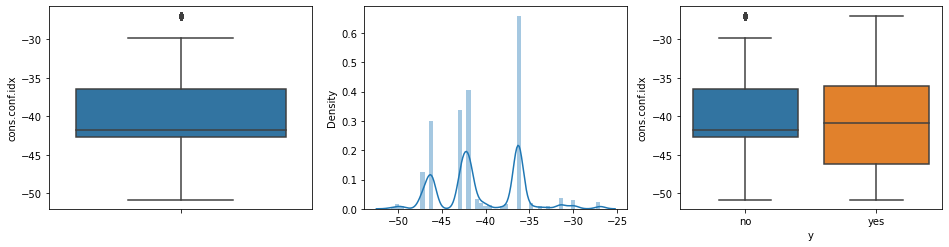

Pdays


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


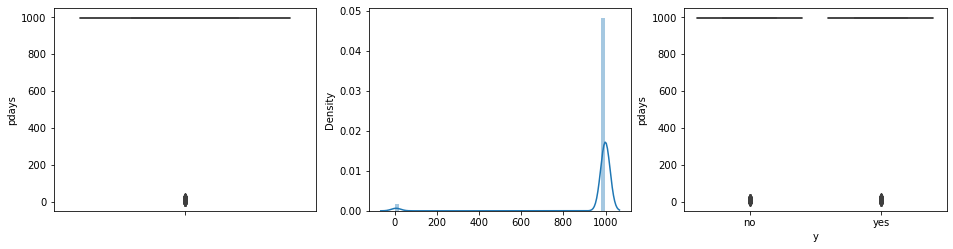

Cons.Price.Idx


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


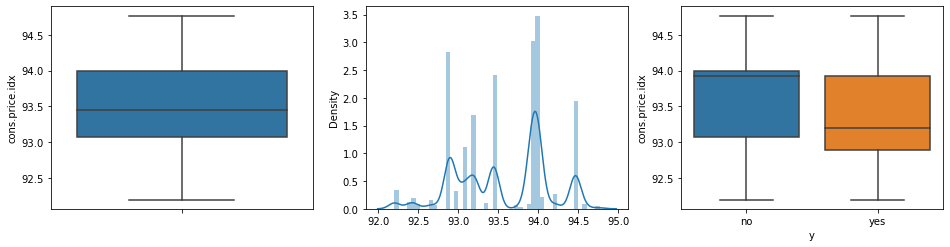

Compaign


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


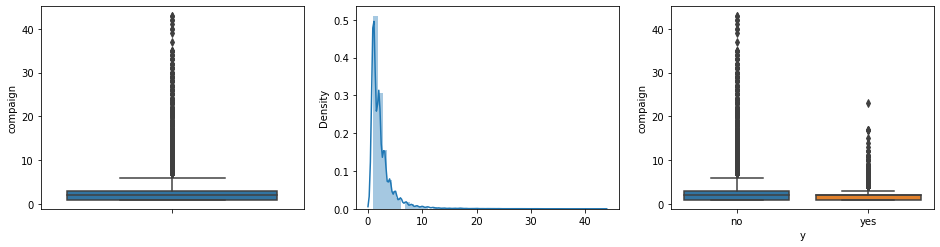

In [34]:
i = 1
for column in var_numerical:
    print(column.title())
    plt.subplots(figsize=(16, 35))
    plt.subplot(len(var_numerical) + 1, 3, i)
    sns.boxplot(y = dataset[column])
    i += 1
    plt.subplot(len(var_numerical) + 1, 3, i)
    sns.distplot(x = dataset[column])
    i += 1
    plt.subplot(len(var_numerical) + 1, 3, i)
    sns.boxplot(x = dataset["y"], y = dataset[column])
    i += 1
    plt.show()

In [35]:
dataset[var_numerical].describe()

,age,euribor3m,previous,cons.conf.idx,pdays,cons.price.idx,compaign
count,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000,38245.000000
mean,39.860871,3.623298,0.170009,-40.541164,963.531651,93.570313,2.566662
std,10.289488,1.730226,0.487169,4.623200,184.295254,0.576367,2.767473
min,17.000000,0.634000,0.000000,-50.800000,0.000000,92.201000,1.000000
25%,32.000000,1.344000,0.000000,-42.700000,999.000000,93.075000,1.000000
50%,38.000000,4.857000,0.000000,-41.800000,999.000000,93.444000,2.000000
75%,47.000000,4.961000,0.000000,-36.400000,999.000000,93.994000,3.000000
max,98.000000,5.045000,7.000000,-26.900000,999.000000,94.767000,43.000000


In [36]:
print(var_numerical)

['age', 'euribor3m', 'previous', 'cons.conf.idx', 'pdays', 'cons.price.idx', 'compaign']


In [37]:
varlist = ['loan', 'housing', 'y']

dataset[varlist] = dataset[varlist].apply(lambda x: x.map({'yes':1, 'no': 0}))

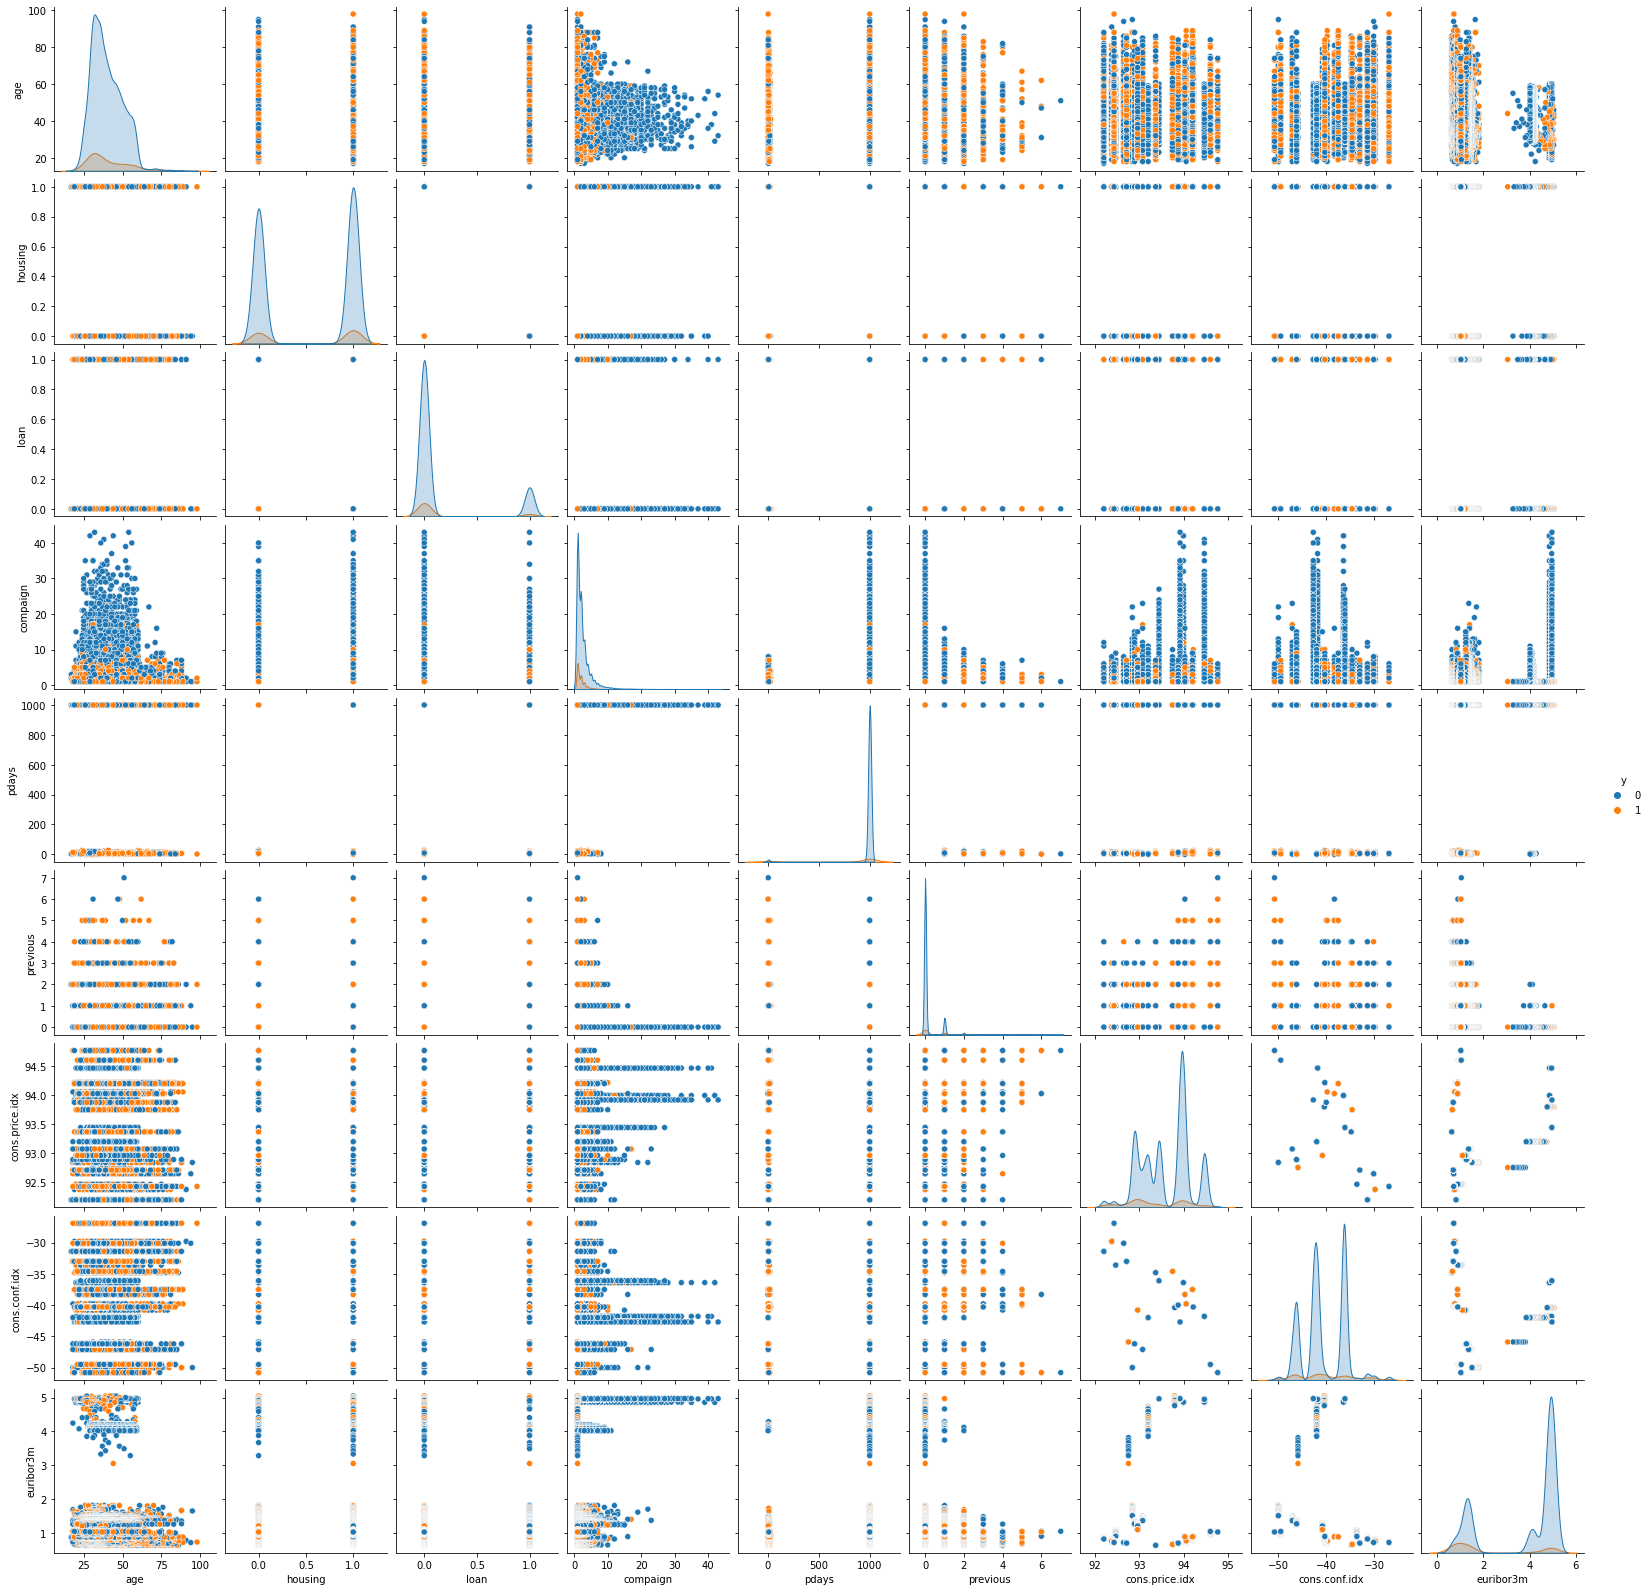

In [38]:
# visualizing numerical columns
sns.pairplot(hue='y', data = dataset)
plt.show()

In [39]:
# # We will convert all the values above 2 in previous to 2
# dataset["previous"] = dataset["previous"].apply(lambda x: 2 if x >= 2 else x)

In [40]:
# #If the number of contacts performed during this campaign and for this client become more than 23 then there is very high possibility that client will not subscribe for term deposit. Even if we contact a person more than 8 times probability is still low.
# #We will drop this column as it will not be known before hand. But it is important to see that we should not contact any client more than 8 times during any campaign.
# dataset.drop(['campaign'], axis = 1, inplace=True)
# var_numerical = list(set(var_numerical) - set(['campaign']))

In [41]:
print(len(var_categorical), var_categorical)
print(len(var_numerical), var_numerical)

9 ['loan', 'month', 'marital', 'contact', 'job', 'education', 'housing', 'poutcome', 'day_of_week']
7 ['age', 'euribor3m', 'previous', 'cons.conf.idx', 'pdays', 'cons.price.idx', 'compaign']


# Convert categorical variable into dummy/indicator variables

In [42]:
# Get the dummy variables for contact, poutcome , job, month, marital, day_of_week, education
# Let's drop the first column from  using 'drop_first = True' as first column can be derived using other columns 
# (dropping redundant column)

contact = pd.get_dummies(dataset.contact, drop_first=True)
poutcome = pd.get_dummies(dataset.poutcome, drop_first=True)
job = pd.get_dummies(dataset.job, drop_first=True)
month = pd.get_dummies(dataset.month, drop_first=True)
marital = pd.get_dummies(dataset.marital, drop_first=True)
day_of_week = pd.get_dummies(dataset.day_of_week, drop_first=True)
education = pd.get_dummies(dataset.education, drop_first=True)

In [43]:
# Concat the dummy columns to the dataframe
dataset = pd.concat([dataset, contact, poutcome , job, month, marital, day_of_week, education], axis=1)
dataset.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,compaign,...,mon,thu,tue,wed,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
0,56,housemaid,married,basic.4y,0,0,telephone,may,mon,1,...,1,0,0,0,0,0,0,0,0,0
1,57,services,married,high.school,0,0,telephone,may,mon,1,...,1,0,0,0,0,0,1,0,0,0
2,37,services,married,high.school,1,0,telephone,may,mon,1,...,1,0,0,0,0,0,1,0,0,0
3,40,admin.,married,basic.6y,0,0,telephone,may,mon,1,...,1,0,0,0,1,0,0,0,0,0
4,56,services,married,high.school,0,1,telephone,may,mon,1,...,1,0,0,0,0,0,1,0,0,0


In [44]:
# Dropping contact, poutcome , job, month, marital, day_of_week, education as we have concatenated the dummies in our original dataframe
dataset.drop(['contact', 'poutcome' , 'job', 'month', 'marital', 'day_of_week', 'education'], axis = 1, inplace = True)
dataset.head()

,age,housing,loan,compaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,y,...,mon,thu,tue,wed,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
0,56,0,0,1,999,0,93.994,-36.4,4.857,0,...,1,0,0,0,0,0,0,0,0,0
1,57,0,0,1,999,0,93.994,-36.4,4.857,0,...,1,0,0,0,0,0,1,0,0,0
2,37,1,0,1,999,0,93.994,-36.4,4.857,0,...,1,0,0,0,0,0,1,0,0,0
3,40,0,0,1,999,0,93.994,-36.4,4.857,0,...,1,0,0,0,1,0,0,0,0,0
4,56,0,1,1,999,0,93.994,-36.4,4.857,0,...,1,0,0,0,0,0,1,0,0,0


In [45]:
#printing total columns and column lenght
dataset.columns, len(dataset.columns)

(Index(['age', 'housing', 'loan', 'compaign', 'pdays', 'previous',
        'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'y', 'telephone',
        'nonexistent', 'success', 'blue-collar', 'entrepreneur', 'housemaid',
        'management', 'retired', 'self-employed', 'services', 'student',
        'technician', 'unemployed', 'aug', 'dec', 'jul', 'jun', 'mar', 'may',
        'nov', 'oct', 'sep', 'married', 'single', 'mon', 'thu', 'tue', 'wed',
        'basic.6y', 'basic.9y', 'high.school', 'illiterate',
        'professional.course', 'university.degree'],
       dtype='object'),
 44)

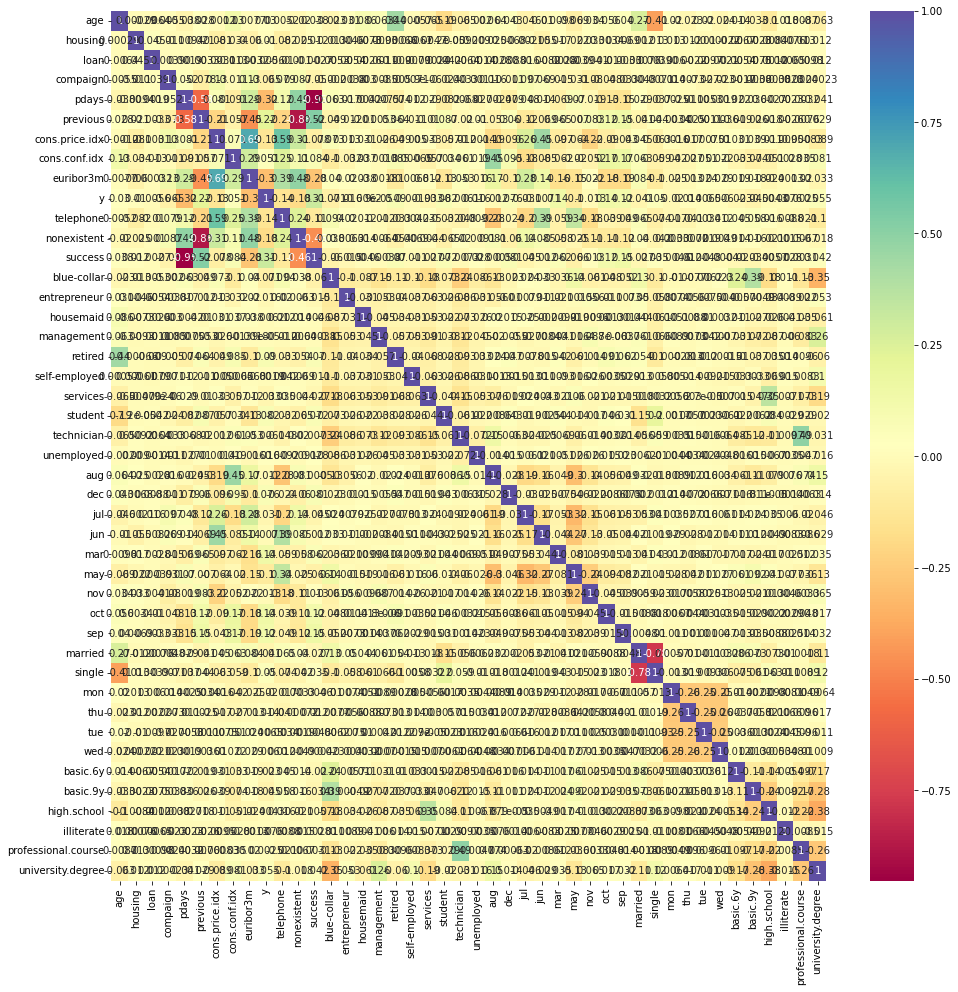

In [46]:
#heatmap
plt.figure(figsize=(16, 16))
sns.heatmap(dataset.corr(), annot=True, cmap='Spectral')
plt.show()


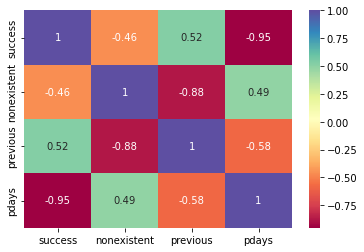

In [47]:
sns.heatmap(dataset[['success', 'nonexistent', 'previous', 'pdays']].corr(), annot=True, cmap='Spectral')
plt.show()

Negative Correlation:
1. Previous v/s Nonexistent
2. Pdays v/s Success

In [48]:
dataset.drop(['previous', 'pdays', 'compaign'], axis = 1, inplace = True)

In [49]:
var_numerical = list(set(var_numerical) - set(['previous', 'pdays', 'compaign']))

In [50]:
print(len(var_categorical), var_categorical)
print(len(var_numerical), var_numerical)

9 ['loan', 'month', 'marital', 'contact', 'job', 'education', 'housing', 'poutcome', 'day_of_week']
4 ['euribor3m', 'cons.price.idx', 'age', 'cons.conf.idx']


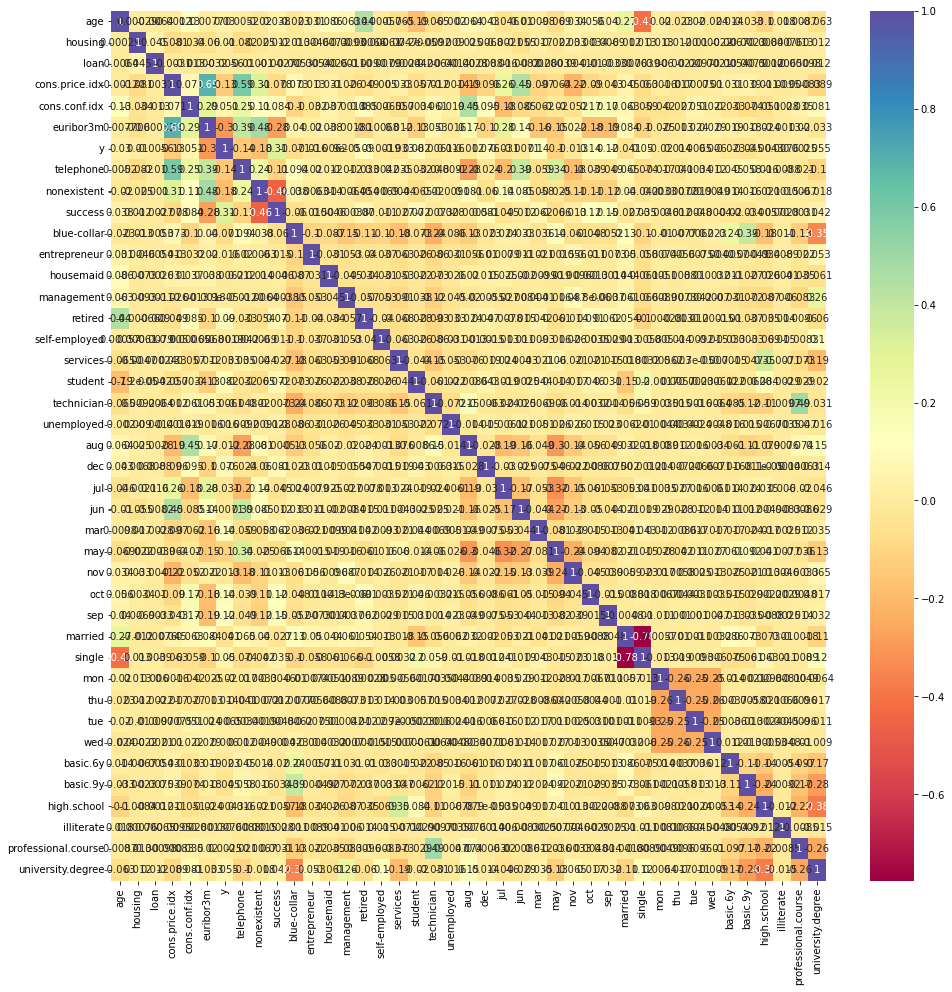

In [51]:
plt.figure(figsize=(16, 16))
sns.heatmap(dataset.corr(), annot=True, cmap='Spectral')
plt.show()

In [52]:
dataset[var_numerical].describe()

,euribor3m,cons.price.idx,age,cons.conf.idx
count,38245.000000,38245.000000,38245.000000,38245.000000
mean,3.623298,93.570313,39.860871,-40.541164
std,1.730226,0.576367,10.289488,4.623200
min,0.634000,92.201000,17.000000,-50.800000
25%,1.344000,93.075000,32.000000,-42.700000
50%,4.857000,93.444000,38.000000,-41.800000
75%,4.961000,93.994000,47.000000,-36.400000
max,5.045000,94.767000,98.000000,-26.900000


In [53]:
check(dataset)

,column,dtypes,nunique,sum_null
0,age,int64,77,0
1,housing,int64,2,0
2,loan,int64,2,0
3,cons.price.idx,float64,26,0
4,cons.conf.idx,float64,26,0
5,euribor3m,float64,314,0
6,y,int64,2,0
7,telephone,uint8,2,0
8,nonexistent,uint8,2,0
9,success,uint8,2,0


# Split Data Into Train and Test

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
# We will divide the training and testing set in 80% and 20% respectively
# We used random_state = 100 so that everytime we run it we will have same set of training and testing set
df_train, df_test = train_test_split(dataset, train_size = 0.8, random_state = 100)

In [56]:
#verifying the split data
print("Train Dataset: "+ str(len(df_train)) + " Test Dataset: " + str(len(df_test)))
print("Train Target Label counts: ")
print(df_train["y"].value_counts())
print("Test Target Label counts: ")
print(df_test["y"].value_counts())

Train Dataset: 30596 Test Dataset: 7649
Train Target Label counts: 
0    27144
1     3452
Name: y, dtype: int64
Test Target Label counts: 
0    6843
1     806
Name: y, dtype: int64


# Rescaling the continuous variables

In [57]:
#we'll use mixscaler as it handles outliers as well
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# MinMaxScaler Object
scaler = MinMaxScaler()

In [58]:
# Fit and Transform the data
# Fit will calculate our Min and Max values
# Transform will operate on standardisation function and scales our values
df_train[var_numerical] = scaler.fit_transform(df_train[var_numerical])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [59]:
# Transform will operate on standardisation function and scales our values
df_test[var_numerical] = scaler.transform(df_test[var_numerical])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [60]:
#verifying the scaling
df_train.head()

,age,housing,loan,cons.price.idx,cons.conf.idx,euribor3m,y,telephone,nonexistent,success,...,mon,thu,tue,wed,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
17301,0.098765,1,1,0.669135,0.338912,0.981183,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
26425,0.407407,1,0,0.389322,0.368201,0.780322,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
38271,0.111111,1,0,0.089634,1.000000,0.024484,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
24709,0.382716,1,0,0.389322,0.368201,0.806393,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
2160,0.148148,1,0,0.698753,0.602510,0.957379,0,1,1,0,...,1,0,0,0,0,0,1,0,0,0


In [61]:
#verifying the scaling
df_test.head()

,age,housing,loan,cons.price.idx,cons.conf.idx,euribor3m,y,telephone,nonexistent,success,...,mon,thu,tue,wed,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
19269,0.407407,0,1,0.484412,0.615063,0.982317,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
17957,0.358025,0,0,0.669135,0.338912,0.980957,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
22711,0.506173,0,0,0.484412,0.615063,0.981637,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
20420,0.395062,1,0,0.484412,0.615063,0.982090,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
38658,0.246914,0,0,0.174591,0.866109,0.019270,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


# Dividing into X and Y sets for the model building

In [62]:
# Divide the train data into X and y

y_train = df_train.pop('y')
X_train = df_train

In [63]:
# Divide the test data into X and y

y_test = df_test.pop('y')
X_test = df_test

In [64]:
#verifying the splitting
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((30596, 40), (30596,), (7649, 40), (7649,))

# Model Buiding

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.model_selection import cross_val_score

In [66]:
from sklearn import metrics

In [67]:
# Draw ROC curve from training and test data probability
def draw_roc( train_actual, train_probs, test_actual, test_probs ):
    train_fpr, train_tpr, train_thresholds = metrics.roc_curve( train_actual, train_probs,
                                              drop_intermediate = False )
    test_fpr, test_tpr, test_thresholds = metrics.roc_curve( test_actual, test_probs,
                                              drop_intermediate = False )
    train_auc_score = metrics.roc_auc_score( train_actual, train_probs )
    test_auc_score = metrics.roc_auc_score( test_actual, test_probs )
    plt.figure(figsize=(5, 5))
    plt.plot( train_fpr, train_tpr, label='ROC curve (area = %0.2f)' % train_auc_score )
    plt.plot( test_fpr, test_tpr, label='ROC curve (area = %0.2f)' % test_auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [68]:
# Predict values and propability of training and testing data
def prediction_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_train_pred_prob = model.predict_proba(X_train)[:, 1]
    y_test_pred = model.predict(X_test)
    y_test_pred_prob = model.predict_proba(X_test)[:, 1]
    return y_train_pred, y_train_pred_prob, y_test_pred, y_test_pred_prob

# Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression (random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [70]:
y_train_pred, y_train_pred_prob, y_test_pred,y_test_pred_prob= prediction_model(classifier, X_train, y_train, X_test, y_test)

In [71]:
prediction_1 = classifier.predict(X_test)

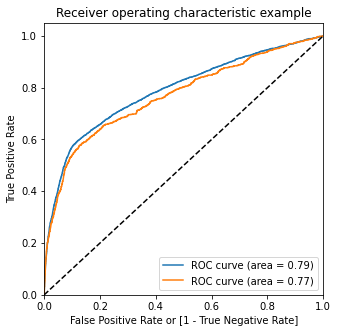

In [72]:
# Drawing ROC curve from training and test data probability
draw_roc(y_train, y_train_pred_prob, y_test, y_test_pred_prob)

In [73]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix

In [74]:
# 1 MLM Logistic Regression
logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)
prediction_1 = logmodel.predict(X_test)

In [75]:
# Score report
print(classification_report(y_test,prediction_1))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      6843
           1       0.62      0.22      0.33       806

    accuracy                           0.90      7649
   macro avg       0.77      0.60      0.64      7649
weighted avg       0.88      0.90      0.88      7649



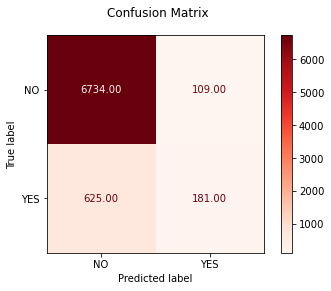

In [76]:
# Plot
plot_1 = plot_confusion_matrix(logmodel, X_test, y_test, display_labels=["NO","YES"],cmap = plt.cm.Reds,values_format = '.2f')
plot_1.figure_.suptitle("Confusion Matrix")
plt.show()

In [77]:
#print accuracy 
print("Accuracy train: ", accuracy_score(y_train, y_train_pred))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred))

Accuracy train:  0.899660086285789
Accuracy test:  0.9039090077134266


# Decision Tree Classifier

In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix

In [79]:
#Decision tree classifier
clf = DecisionTreeClassifier(max_depth = 10, random_state = 40)
clf.fit(X_train,y_train)
prediction_2 = clf.predict(X_test)

In [80]:
# Score report
print(classification_report(y_test,prediction_2))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      6843
           1       0.57      0.29      0.38       806

    accuracy                           0.90      7649
   macro avg       0.74      0.63      0.67      7649
weighted avg       0.88      0.90      0.89      7649



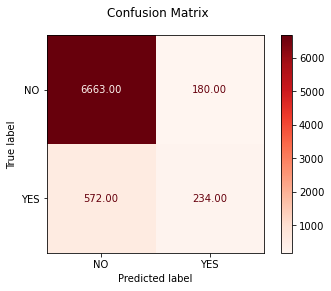

In [81]:
# Plot
plot_2 = plot_confusion_matrix(clf, X_test, y_test, display_labels=["NO","YES"],cmap = plt.cm.Reds,values_format = '.2f')
plot_2.figure_.suptitle("Confusion Matrix")
plt.show()

In [82]:
y_train_pred, y_train_pred_prob, y_test_pred,y_test_pred_prob= prediction_model(clf, X_train, y_train, X_test, y_test)

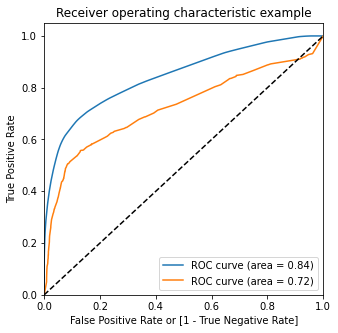

In [83]:
# Drawing ROC curve from training and test data probability
draw_roc(y_train, y_train_pred_prob, y_test, y_test_pred_prob)

In [84]:
print("Accuracy train: ", accuracy_score(y_train, y_train_pred))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred))

Accuracy train:  0.9161328278206301
Accuracy test:  0.9016864949666623


# Gradient boosting

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

gbc= GradientBoostingClassifier ()

In [86]:
gbc.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [87]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [88]:
prediction_2 = gbc.predict(X_test)

In [89]:
# Score report
print(classification_report(y_test,prediction_2))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      6843
           1       0.66      0.24      0.35       806

    accuracy                           0.91      7649
   macro avg       0.79      0.61      0.65      7649
weighted avg       0.89      0.91      0.89      7649



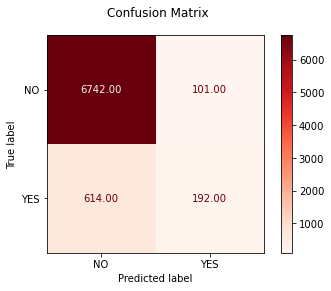

In [98]:
# Plot
plot_2 = plot_confusion_matrix(gbc, X_test, y_test, display_labels=["NO","YES"],cmap = plt.cm.Reds,values_format = '.2f')
plot_2.figure_.suptitle("Confusion Matrix")
plt.show()

In [91]:
y_train_pred, y_train_pred_prob, y_test_pred,y_test_pred_prob= prediction_model(gbc, X_train, y_train, X_test, y_test)

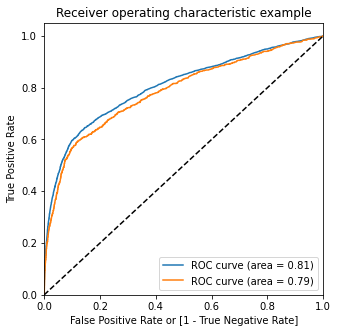

In [92]:
# Drawing ROC curve from training and test data probability
draw_roc(y_train, y_train_pred_prob, y_test, y_test_pred_prob)

In [93]:
print("Accuracy train: ", accuracy_score(y_train, y_train_pred))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred))

Accuracy train:  0.9050529480977906
Accuracy test:  0.9065237285919728


# XG Boosting

In [94]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [95]:
#import the library file and train the model
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [96]:
#test the data
prediction_2 = classifier.predict(X_test)

In [97]:
# Score report
print(classification_report(y_test,prediction_2))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      6843
           1       0.60      0.30      0.40       806

    accuracy                           0.91      7649
   macro avg       0.76      0.64      0.68      7649
weighted avg       0.89      0.91      0.89      7649



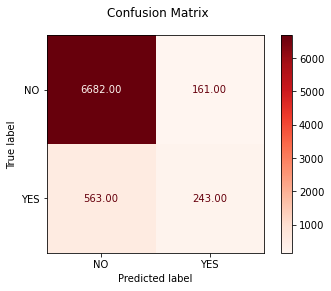

In [99]:
# Plot
plot_2 = plot_confusion_matrix(classifier, X_test, y_test, display_labels=["NO","YES"],cmap = plt.cm.Reds,values_format = '.2f')
plot_2.figure_.suptitle("Confusion Matrix")
plt.show()

In [100]:
#testing data
y_train_pred, y_train_pred_prob, y_test_pred,y_test_pred_prob= prediction_model(classifier, X_train, y_train, X_test, y_test)

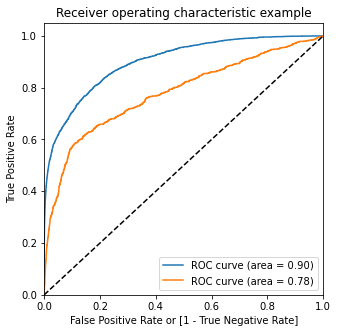

In [101]:
# Drawing ROC curve from training and test data probability
draw_roc(y_train, y_train_pred_prob, y_test, y_test_pred_prob)

In [103]:
print("Accuracy train: ", accuracy_score(y_train, y_train_pred))
print("Accuracy test: ", accuracy_score(y_test, y_test_pred))

Accuracy train:  0.9286181200156883
Accuracy test:  0.905347104196627
